In [1]:
import numpy as np
import pandas as pd
import torch as t
import matplotlib.pyplot as plt
import seaborn as sb

from scipy.interpolate import interp1d
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler

from scipy.stats import pearsonr


import importlib

import random
random.seed(715)

In [42]:
def roll_tile_array(a, length, batch_size):
    return np.array([[a[i+j:i+j+length] for j in range(batch_size)]
                     for i in range(0, len(a) + 1 - length - batch_size, length)])

<module 'utils.simulator' from '/home/yangfan/book/industrial_ai/datamake/utils/simulator.py'>

In [104]:
d = pd.read_csv('data/ok_mock_data_20191010_1')

In [105]:
d.columns

Index(['InRateA', 'InRateB', 'InTemp', 'HeatTemp', 'InSpeed', 'OutTemp',
       'OutSpeed', 'OutRateC', 'OutRateD', 'OutRateE', 'OutRateA', 'OutRateB',
       'SrcId', 'Purity', 'InMassA', 'InMassB', 'Valve', 'OutRateC_n',
       'OutRateA_n', 'OutRateB_n', 'OutRateD_n', 'OutRateE_n', 'OutMassA',
       'OutMassB', 'OutMassC', 'OutMassD', 'OutMassE', 'OutSpeed_n'],
      dtype='object')

In [108]:
#定义常量
FTR_COLS = ['InRateA', 'InTemp', 'HeatTemp', 'InSpeed']
VAL_COLS = ['OutRateC', 'OutRateD', 'OutRateE', 'OutRateA', 'OutRateB']
MID_COLS = ['OutTemp', 'OutSpeed']
PRED_COLS = MID_COLS + VAL_COLS

NEW_FTR_COLS = ['InMassA', 'InMassB', 'Valve', 'Purity', 
                'InTemp', 'HeatTemp', 'InSpeed']
NEW_VAL_COLS = ['OutMassA', 'OutMassB', 'OutMassB', 'OutMassB', 'OutMassB']
NEW_MID_COLS = ['OutTemp', 'OutSpeed_n']

RNN的效果

In [188]:
import utils.simulator as sim
importlib.reload(sim)
#m = sim.SimpleLstmBlock(7, 1, 17, 21)
m = sim.LstmBlock(7, 1, [17], [21], 19, 20)
l = sim.LstmNetwork(mod=m, device='cuda', solo_output=True)


l.fit(d[NEW_FTR_COLS].values, d.OutMassC.values, max_epoch=2000)

epoch: 0
epoch: 50
epoch: 100
epoch: 150
epoch: 200
epoch: 250
epoch: 300
epoch: 350
epoch: 400
epoch: 450
epoch: 500
epoch: 550
epoch: 600
epoch: 650
epoch: 700
epoch: 750
epoch: 800
epoch: 850
epoch: 900
epoch: 950
epoch: 1000
epoch: 1050
epoch: 1100
epoch: 1150
epoch: 1200
epoch: 1250
epoch: 1300
epoch: 1350
epoch: 1400
epoch: 1450
epoch: 1500
epoch: 1550
epoch: 1600
epoch: 1650
epoch: 1700
epoch: 1750
epoch: 1800
epoch: 1850
epoch: 1900
epoch: 1950


In [191]:
l.predict(d[:50][NEW_FTR_COLS].values)

(array([0.02472273, 0.02419564, 0.02557537, 0.02356729, 0.02193039,
        0.02452207, 0.024068  , 0.02204642, 0.02435856, 0.02492443,
        0.02590834, 0.02183963, 0.02354886, 0.0234645 , 0.02473182,
        0.02427049, 0.02479012, 0.02324267, 0.02404155, 0.02307354,
        0.02376534, 0.02419938, 0.02439629, 0.02242812, 0.02449815,
        0.02264334, 0.02298019, 0.02152396, 0.02069051, 0.02276996,
        0.02314275, 0.02489021, 0.02318256, 0.02459627, 0.02277128,
        0.02246706, 0.02601309, 0.02156016, 0.0240565 , 0.01958448,
        0.02528625, 0.02284229, 0.02312258, 0.0228046 , 0.02123622,
        0.02286182, 0.0232622 , 0.02138504, 0.02366915, 0.02250463],
       dtype=float32),
 <generator object LstmNetwork.predict.<locals>.<genexpr> at 0x7f79e5c15f68>)

In [193]:
d[:50].OutMassC.values

array([0.02503689, 0.02372699, 0.02564202, 0.02324211, 0.02212458,
       0.02478155, 0.02402277, 0.02196823, 0.02417935, 0.02469197,
       0.02571698, 0.02184815, 0.02332784, 0.02336605, 0.02456893,
       0.024139  , 0.02462646, 0.0231803 , 0.02394662, 0.02290956,
       0.0236475 , 0.02419193, 0.02424485, 0.02235292, 0.02437599,
       0.02251689, 0.02284797, 0.02150281, 0.02060686, 0.02264794,
       0.02299713, 0.02471472, 0.02300592, 0.02441351, 0.02259117,
       0.02234005, 0.02581751, 0.0214082 , 0.02389363, 0.01952126,
       0.02503327, 0.02274939, 0.02296421, 0.02269126, 0.02118225,
       0.02270897, 0.02315462, 0.02128752, 0.02351825, 0.02242787])

mse: 2.5824896104039655e-08 
mape 0.004922353022749287 
r2: 0.9976467016245213 
cor: 0.9991164191552829 
pre: 0.9999291353972704


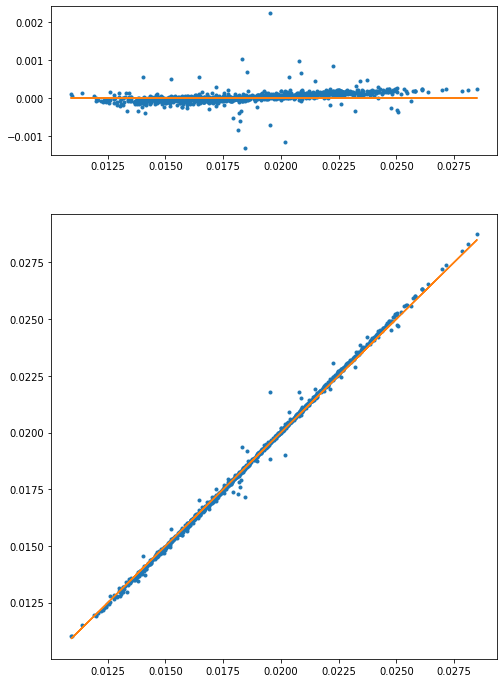

In [196]:
from utils.evaluate import evaluate

evaluate(d.OutMassC.values, l.predict(d[NEW_FTR_COLS].values)[0])

mse: 2.037082205561941e-07 
mape 0.0183505691936788 
r2: 0.9814370511859843 
cor: 0.9908840442185214 
pre: 0.999448132540746


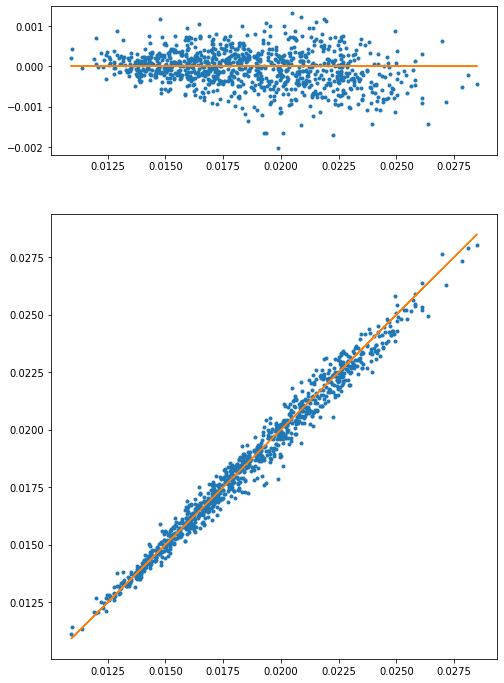

In [186]:
n = sim.nn_test(d[NEW_FTR_COLS].values, d.OutMassC.values,d[NEW_FTR_COLS].values, d.OutMassC.values)

加入机理特征

mse: 1.456357230115891e-07 
mape 0.016000896067829885 
r2: 0.9867289181341088 
cor: 0.9934648891660759 
pre: 0.9995934402414299


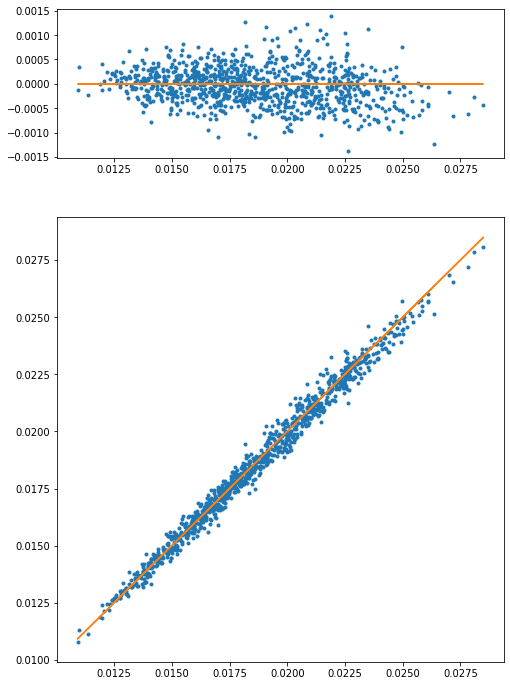

In [197]:
n2 = sim.nn_test(d[NEW_FTR_COLS+["OutRateC"]].values, d.OutMassC.values,d[NEW_FTR_COLS+["OutRateC"]].values, d.OutMassC.values)

In [144]:
import torch as t
from torch import nn


class LstmBlock(nn.Module):
    def __init__(self, sz_input, sz_output, sz_lstm_in, sz_lstm_out, layers=1, drop_rates=None):
        super(LstmBlock, self).__init__()
        self.fc1 = nn.Linear(sz_input, sz_lstm_in)
        self.fc2 = nn.Linear(sz_lstm_out, sz_output)
        self.rnn = nn.LSTM(input_size=sz_lstm_in, 
                           hidden_size=sz_lstm_out, 
                           num_layers=layers, batch_first=True)


    def forward(self, input_ftrs, hidden):
        x = self.fc1(input_ftrs)
        x, h = self.rnn(x, hidden)
        x = self.fc2(x)
        return x, h



In [145]:
l = LstmBlock(4, 1, 5, 5)

In [149]:
l(t.Tensor([[[1,2,3,4], [1,2,3,4]]]), None)

(tensor([[[-0.2409],
          [-0.2503]]], grad_fn=<AddBackward0>),
 (tensor([[[-0.0702, -0.1504,  0.0027,  0.0765,  0.1325]]],
         grad_fn=<StackBackward>),
  tensor([[[-0.1343, -0.2235,  0.0069,  0.1530,  0.3897]]],
         grad_fn=<StackBackward>)))